In [19]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [20]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-07 14:45:56--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  16.1MB/s    in 17s     

2020-07-07 14:46:13 (18.6 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [21]:
#ekstrak dataset
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Split **dataset**

In [22]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [23]:
#make directory
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [24]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [25]:
x=len(os.listdir('/tmp/rockpaperscissors/scissors'))
y=len(os.listdir('/tmp/rockpaperscissors/paper'))
z=len(os.listdir('/tmp/rockpaperscissors/rock'))
tl= x+y+z
tl

2188

In [27]:
# direktori rock,paper,scissors pada direktori data training
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [28]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)


# Train & test Split 

In [29]:
# memecah direktori rock menjadi data train dan data validasi
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.20)

# memecah direktori paper menjadi data train dan data validasi
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.20)

# memecah direktori scissors menjadi data train dan data validasi
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.20)

# Move Dataset

In [33]:
import shutil

for i in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, i), os.path.join(train_roc, i))
for i in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,i), os.path.join(train_pap,i))
for i in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,i), os.path.join(train_sci,i))

for i in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, i), os.path.join(val_roc,i))
for i in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,i), os.path.join(val_pap,i))
for i in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,i), os.path.join(val_sci,i))

In [34]:
x=len(os.listdir('/tmp/rockpaperscissors/train/scissors'))
y=len(os.listdir('/tmp/rockpaperscissors/train/paper'))
z=len(os.listdir('/tmp/rockpaperscissors/train/rock'))
tl2= x+y+z
tl2

1749

In [35]:
A=len(os.listdir('/tmp/rockpaperscissors/val/scissors'))
B=len(os.listdir('/tmp/rockpaperscissors/val/paper'))
C=len(os.listdir('/tmp/rockpaperscissors/val/rock'))
tl3= A+B+C
tl3

439

# Image Augmentation

In [36]:
#Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 90,
    horizontal_flip = True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range = 0.2,
    fill_mode = 'nearest'
    )
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [39]:
#model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [40]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi mencapai 90%, train data diberhentikan !")
      self.model.stop_training = True

callbacks = myCallback()

In [41]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics=['accuracy']
    )

In [42]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2,
      callbacks=[callbacks]
)



Epoch 1/20
25/25 - 58s - loss: 1.1262 - accuracy: 0.3438 - val_loss: 1.0639 - val_accuracy: 0.4750
Epoch 2/20
25/25 - 58s - loss: 1.0704 - accuracy: 0.4250 - val_loss: 1.0663 - val_accuracy: 0.4250
Epoch 3/20
25/25 - 56s - loss: 1.0639 - accuracy: 0.4350 - val_loss: 1.0050 - val_accuracy: 0.4500
Epoch 4/20
25/25 - 55s - loss: 1.0052 - accuracy: 0.4575 - val_loss: 0.8070 - val_accuracy: 0.6562
Epoch 5/20
25/25 - 56s - loss: 0.9236 - accuracy: 0.5678 - val_loss: 0.6047 - val_accuracy: 0.8625
Epoch 6/20
25/25 - 57s - loss: 0.6550 - accuracy: 0.7300 - val_loss: 0.4222 - val_accuracy: 0.8313
Epoch 7/20
25/25 - 56s - loss: 0.4894 - accuracy: 0.7972 - val_loss: 0.1975 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 57s - loss: 0.3701 - accuracy: 0.8587 - val_loss: 0.3243 - val_accuracy: 0.8813
Epoch 9/20
25/25 - 57s - loss: 0.4114 - accuracy: 0.8637 - val_loss: 0.2230 - val_accuracy: 0.9125
Epoch 10/20
25/25 - 57s - loss: 0.3436 - accuracy: 0.8687 - val_loss: 0.2126 - val_accuracy: 0.9375
Epoch 11/

In [43]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


Saving Screenshot_20200707-225054_Gallery.jpg to Screenshot_20200707-225054_Gallery.jpg
Screenshot_20200707-225054_Gallery.jpg
thi is a paper


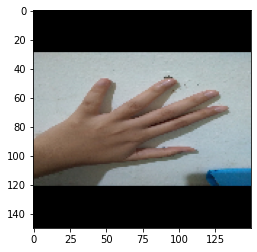

In [44]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('thi is a paper')
  elif classes[0,1]!=0:
    print('this is a rock')
  else:
    print('this is a scissors')